In [3]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import scipy.misc
import numpy as np
import urllib
import cStringIO
import skimage
import skimage.color
import matplotlib.pyplot as plt

# Převod do šedotónu

In [4]:
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
URL = "http://plzen.cz/kamera.php?0.8989779513794929"


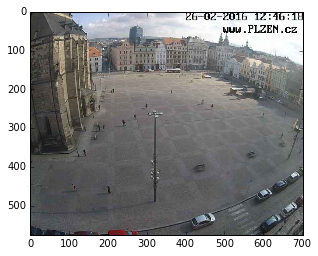

In [5]:
file = cStringIO.StringIO(urllib.urlopen(URL).read())
img = scipy.misc.imread(file)
plt.imshow(img)

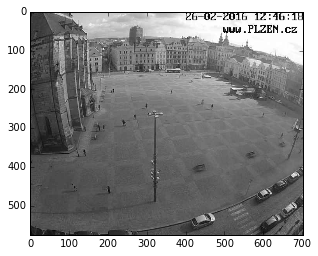

In [6]:
# from skimage import color
imggray = skimage.color.rgb2gray(img)
plt.imshow(imggray, cmap='gray')

# Histogram

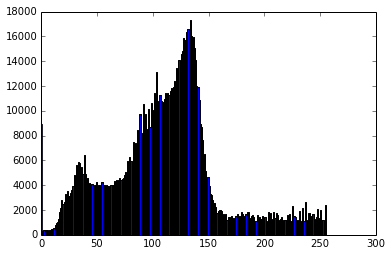

In [8]:
a, b, c = plt.hist(img.ravel(),255)

(255,)
(256,)


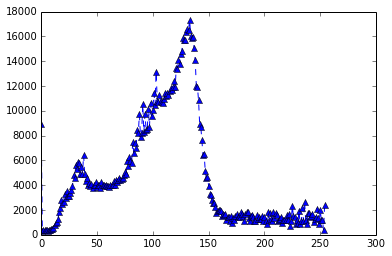

In [9]:
print a.shape
print b.shape
plt.plot(b[:-1], a, '^b--')



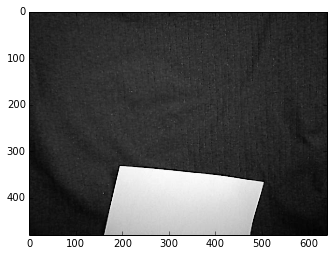

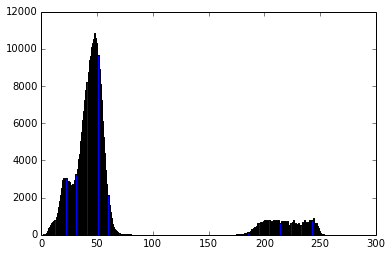

In [3]:

import cv2

import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.misc
import urllib
import cStringIO

import matplotlib.pyplot as plt

# scipy.misc.imread(
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"

file = cStringIO.StringIO(urllib.urlopen(URL).read())

img = scipy.misc.imread(file)

imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(imgg, cmap='gray')
plt.show()
a, b, c = plt.hist(imgg.ravel(),255)

# Zvýšení kontrastu

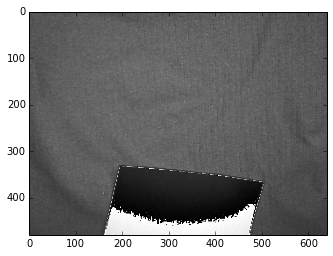

In [4]:
plt.imshow(imgg + 50, cmap='gray')
plt.show()

# Rotace a zvětšení

[[35 32 29 29 32]
 [30 29 27 28 30]
 [29 30 30 30 29]
 [33 35 36 35 32]
 [32 34 36 36 35]]
[[ 17.5  16.   14.5  14.5  16. ]
 [ 15.   14.5  13.5  14.   15. ]
 [ 14.5  15.   15.   15.   14.5]
 [ 16.5  17.5  18.   17.5  16. ]
 [ 16.   17.   18.   18.   17.5]]


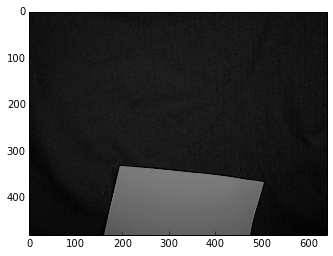

In [15]:
print imgg[:5,:5]
imgg05 = imgg*0.5
print imgg05[:5,:5]
plt.imshow(imgg05, cmap='gray', vmax=255, vmin=0)
plt.show()

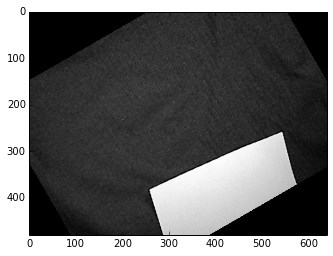

In [20]:
imr = scipy.misc.imrotate(imgg, 30)
plt.imshow(imr, cmap='gray')
plt.show()

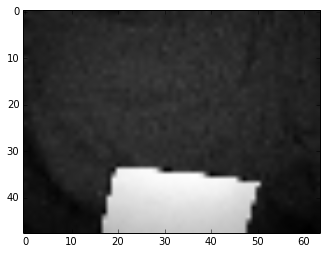

In [25]:
imgg_res = scipy.misc.imresize(imgg, 0.1)
plt.imshow(imgg_res, cmap='gray')
plt.show()

# Prahování

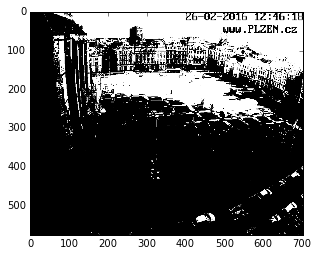

In [11]:
plt.imshow(imggray > 0.5, cmap='gray')